# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

In the project of segmenting Netflix Movies and TV-shows, the main goal was to perform unsupervised machine learning for clustering. Here's a summary of the key steps and decisions made during the project:

Data Understanding: The project began with importing the dataset and gaining a basic understanding of its contents. This involved inspecting the dataset's structure, data types, and basic statistics.

Data Wrangling: Data preprocessing was planned and executed. The date feature was converted to a pandas datetime object for easier manipulation. Missing values were not handled extensively, as they were limited and did not significantly impact the analysis. The decision was made to utilize the text-based "Description" feature for machine learning.

Text Preprocessing: Text data preprocessing was performed on the "Description" feature. This included converting text to lowercase, removing punctuation, stopping words, and extra white spaces. These steps prepared the text for vectorization.

Text Vectorization: The TfidfVectorizer was used to convert the preprocessed text data into numerical vectors. A maximum of 400 features were chosen to represent each review observation, providing a 400-length feature vector for each.

Clustering Models: Three different clustering models were experimented with:

K-means: This is a traditional clustering algorithm that partitions the data into K clusters based on similarity. It was one of the first methods tried.
Hierarchical Clustering: Hierarchical clustering arranges data points into a hierarchy of clusters. This approach was explored to understand potential hierarchical relationships in the data.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN is a density-based clustering algorithm that can identify clusters of varying shapes and sizes. It was chosen as another clustering method to compare with K-means and hierarchical clustering.
The project aimed to identify meaningful clusters within the Netflix Movies and TV-shows dataset based on the content descriptions. The choice of clustering algorithms allowed for different perspectives on how the data could be grouped.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset under consideration contains information about TV shows and movies available on Netflix as of 2019. This dataset was collected from Flixable, a third-party Netflix search engine. In recent years, Netflix has witnessed significant changes in its content library. In 2018, it was reported that the number of TV shows on Netflix had almost tripled since 2010, while the number of movies had decreased significantly.

The goal of this project is to perform a comprehensive analysis of the Netflix dataset to extract valuable insights and trends. This analysis aims to answer questions and uncover patterns such as:

Content Trends: Explore how the quantity of TV shows and movies has evolved over the years. Are there noticeable shifts in the content mix, and what might be the reasons behind these changes?

Content Duration: Analyze the distribution of content duration (runtime) for both TV shows and movies. Are there any trends in the length of content?

Content Ratings: Investigate the distribution of content ratings (e.g., PG, TV-MA) to understand the diversity of content available on Netflix.

Release Year Analysis: Examine the distribution of content release years. Are there patterns in the years when content was added to Netflix?

Country of Production: Explore the countries where content is produced. Which countries contribute the most content to Netflix?

Content Analysis: Perform a textual analysis of the descriptions to identify common themes or keywords in the content. Are there recurring topics in the descriptions?

Integration with External Data: Investigate the possibility of integrating this dataset with external sources, such as IMDb ratings or Rotten Tomatoes scores, to enrich the analysis and gain a deeper understanding of content quality and popularity.

The insights derived from this analysis can be valuable for both Netflix and its viewers. Netflix can use these insights to make informed decisions about content acquisition and production. Additionally, viewers can benefit from a better understanding of the content available on the platform, helping them discover shows and movies that align with their preferences.

This project offers an opportunity to explore trends in the rapidly evolving world of streaming content and provides a foundation for more advanced analyses and machine learning applications in the future.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [38]:
# Import Libraries
# Import Libraries
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
# avoid warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


# text preprocessing libraries

### Dataset Loading

In [39]:
# Load Dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.CSV")

### Dataset First View

In [40]:
# Dataset First Look
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6667,s6668,Movie,The Millions,"Toka McBaror, Tunde Apalowo","Ramsey Nouah, Blossom Chukwujekwu, Ayo Makun, ...",Nigeria,"July 17, 2020",2019,TV-MA,95 min,"Comedies, International Movies","To pull off a massive heist, a charismatic con..."
7352,s7353,Movie,Unknown Origins,David Galán Galindo,"Javier Rey, Verónica Echegui, Brays Efe, Anton...",Spain,"August 28, 2020",2020,TV-MA,97 min,"International Movies, Thrillers",A very chiseled but somber detective must find...
2388,s2389,Movie,Get Smart,Peter Segal,"Steve Carell, Anne Hathaway, Dwayne Johnson, A...",United States,"April 1, 2019",2008,PG-13,110 min,"Action & Adventure, Comedies",When the identities of secret agents are compr...
6273,s6274,TV Show,The Day I Met El Chapo,NaN,Kate del Castillo,United States,"October 20, 2017",2017,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Mexican superstar actress Kate del Castillo re...
4062,s4063,Movie,Mi Obra Maestra,Gastón Duprat,"Guillermo Francella, Luis Brandoni, Raúl Aréva...","Argentina, Spain","January 25, 2019",2018,TV-MA,105 min,"Comedies, International Movies",A sly art dealer tries to revive the career of...


### Dataset Rows & Columns count

In [41]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [42]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [43]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [44]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing value in the dataset')

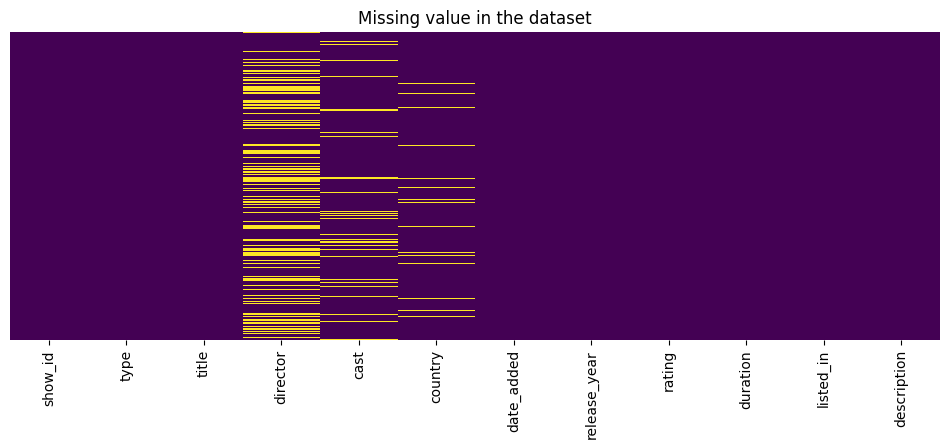

In [45]:
# Visualizing the missing values
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cbar=False,
            cmap='viridis', yticklabels=False)
plt.title('Missing value in the dataset')

### What did you know about your dataset?

This is an unsupervised machine learning project that focuses on the segmentation of Netflix movies and TV shows based on various features and characteristics. The dataset used for this project contains information about movies and TV shows available on Netflix, including details such as title, director, cast, country, genre, release year, rating, duration, and a description.

* Data Cleaning:

The initial dataset contained some duplicated observations, which were removed to ensure data quality. Additionally, there are four features (director, cast, country, date_added) with missing values (NaN). These missing values were handled during the data preprocessing stage.

* Data Preprocessing:

Missing Values: The missing values in the 'director,' 'cast,' 'country,' and 'date_added' columns were addressed. Depending on the specific column, missing values were either filled with appropriate values or dropped if they couldn't be reasonably imputed.
Feature Engineering:

Text Data: The 'description' feature, which contains textual information about the content, was processed to prepare it for analysis. This included lowercasing, punctuation removal, and handling of stopwords.

* Exploratory Data Analysis (EDA):

Basic statistics and visualizations were used to gain insights into the dataset. This included examining the distribution of content types (movies vs. TV shows), exploring the distribution of ratings and genres, and understanding the content's release patterns.

* Unsupervised Learning - Clustering:

The primary focus of this project is to segment the Netflix content into clusters based on its attributes. Various clustering algorithms, such as K-means, Hierarchical Clustering, and DBSCAN, were applied to group similar content together. The goal is to discover meaningful patterns or groupings within the dataset.

* Next Steps:

After clustering, the clusters can be analyzed to understand what characteristics define each group of content. Insights from this unsupervised analysis can be used to recommend content to users, personalize user experiences, or aid in content recommendation systems. Further analysis and visualization can provide valuable insights into Netflix's content library and its audience's preferences.

* Challenges:

Dealing with missing data in features like 'director' and 'cast.'

Text preprocessing and feature engineering for the 'description' column.

Choosing the appropriate number of clusters for clustering algorithms.

Interpretation and visualization of the clusters to derive actionable insights for content recommendation and catalog management.

## ***2. Understanding Your Variables***

In [46]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [47]:
# Dataset Describe
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

show_id: A unique identifier for each observation, not highly useful.

type: Describes whether the entry is a TV series or a movie.

title: The title of the movie or TV show.

director: The name of the director for the content.

cast: Information about the cast members.

country: The country of origin for the content.

date_added: The date the content was added to Netflix.

release_year: The year when the content was originally released.

rating: The TV rating of the show.

### Check Unique Values for each variable.

In [48]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
    print("unique values in", i, "is", df[i].nunique(), ".")

unique values in show_id is 7787 .
unique values in type is 2 .
unique values in title is 7787 .
unique values in director is 4049 .
unique values in cast is 6831 .
unique values in country is 681 .
unique values in date_added is 1565 .
unique values in release_year is 73 .
unique values in rating is 14 .
unique values in duration is 216 .
unique values in listed_in is 492 .
unique values in description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [49]:
# Write your code to make your dataset analysis ready.
# Import necessary libraries
import pandas as pd
import numpy as np

# Function to handle the 'date_added' feature


def handle_date_added(date_added_values):
    fin_date = []
    for date in date_added_values:
        if pd.isna(date):
            fin_date.append(np.nan)
        else:
            # Extracting day
            day = date.split()[1]
            day = int(day[:-1])

            # Extracting month
            month = date.split()[0]
            month_map = {
                'January': 1, 'February': 2, 'March': 3, 'April': 4,
                'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9,
                'October': 10, 'November': 11, 'December': 12
            }
            month = month_map[month]

            # Extracting year
            year = date.split()[-1]
            # Ensures leading zeros for month and day
            fin_date.append(f'{year}-{month:02d}-{day:02d}')

    # Returning as datetime
    return pd.to_datetime(fin_date)

In [50]:
df['date_added'] = handle_date_added(df.date_added)

In [51]:
# hindling the missing values
df[['director', 'cast', 'country']] = df[[
    'director', 'cast', 'country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace=True)

In [52]:
df['cast'] = df['cast'].apply(lambda x: np.nan if pd.isna(x) else x.split(','))

In [53]:
df['country'].value_counts()

country
United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

In [54]:
df.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

The additional insight provided indicates that the 'country' column contains entries where some movies or TV shows were filmed in multiple countries. Similarly, the 'listed_in' column includes multiple genres associated with some entries. To simplify the analysis and make it more manageable, the following actions were taken:

Primary Country Selection: For movies or TV shows that were filmed in multiple countries, only the primary country where the respective content was filmed was considered. This means that if a movie or TV show was filmed in several countries, only one of those countries (likely the primary filming location) was retained for analysis.

Primary Genre Selection: Similarly, for entries with multiple genres associated with them, only the primary genre was considered for analysis. This simplifies the genre classification by focusing on the primary genre that best represents the content.

In [55]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [105]:
# country in which a movie was producted
df.country.value_counts()

country
United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: count, Length: 82, dtype: int64

In [106]:
# genre of shows
df.listed_in.value_counts()

listed_in
Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals            

Typecasting 'duration from string to integer

In [108]:
# Splitting the duration column and chaging the datatype to integer values
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [110]:
# Number of seasons for tv shows
df[df['type'] == 'TV Show'].duration.value_counts()

duration
1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: count, dtype: int64

In [112]:
# Movie length in minutes
df[df['type'] == 'Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [113]:
# datatype of duration
df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [56]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [57]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [58]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [59]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [60]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [61]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [62]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [63]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [64]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [65]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [66]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [67]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [68]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [69]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [70]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [74]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [75]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [76]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [77]:
# Expand Contraction

#### 2. Lower Casing

In [78]:
# Lower Casing

#### 3. Removing Punctuations

In [79]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [80]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [81]:
# Remove Stopwords

In [82]:
# Remove White spaces

#### 6. Rephrase Text

In [83]:
# Rephrase Text

#### 7. Tokenization

In [84]:
# Tokenization

#### 8. Text Normalization

In [85]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [86]:
# POS Taging

#### 10. Text Vectorization

In [87]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [88]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [89]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [90]:
# Transform Your data

### 6. Data Scaling

In [91]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [92]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [93]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [94]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [95]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [96]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [98]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [99]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [100]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [103]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [104]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***